In [153]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import time

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn import metrics

Importing the CSV file using pandas and changed column name B-M to Diagnosis

In [180]:
df = pd.read_csv("Worksheet in CaseStudy_Cancer_1.csv") #importing csv file by Pandas to df
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
print("Row, Col", df.shape) #finding the shape of the data set

Row, Col (569, 32)


In [64]:
a=df.isnull().sum() #finding the null value in the data set for data cleaning
print(a)



ID                      0
Diagnosis               0
radius                  0
texture                 0
perimeter               0
area                    0
smoothness              0
compactness             0
concavity               0
concave points          0
Symmetry                0
fractal dimension       0
SE-radius               0
texture-SE              0
perimeter-SE            0
area-SE                 0
smoothness-SE           0
compactness-SE          0
concavity-SE            0
concave points-SE       0
Symmetry-SE             0
fractal dimension-SE    0
radius-W                0
texture-W               0
perimeter-W             0
area-W                  0
smoothness-W            0
compactness-W           0
concavity-W             0
concave points-W        0
Symmetry-W              0
fractal dimension-W     0
dtype: int64


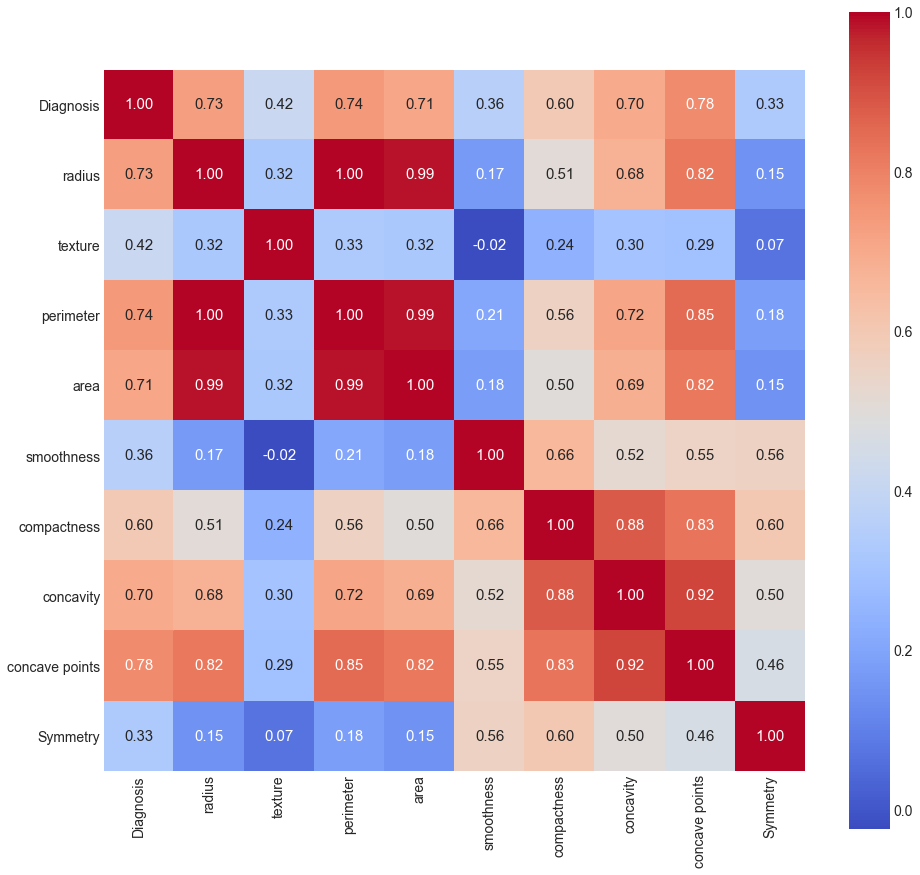

In [89]:
features_mean= list(df.columns[1:11])
corr = df[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 
plt.show()

In [15]:
print(df.shape) #printing the shape of the data set

(569, 32)


In [16]:
a1=df.select_dtypes(include=['object']).isnull().sum()

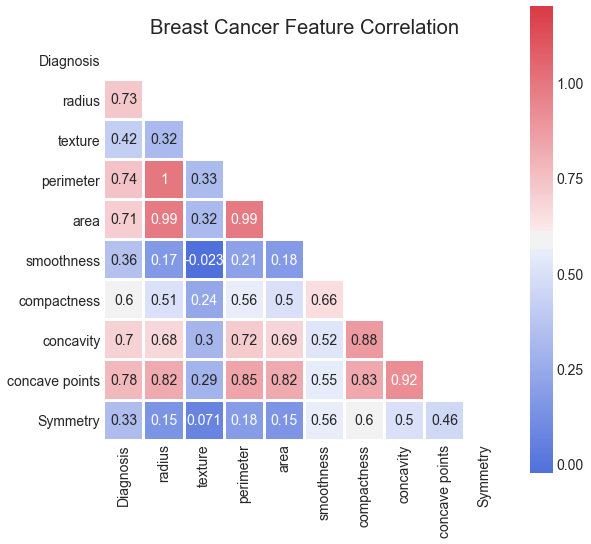

In [86]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

data = pd.read_csv("Worksheet in CaseStudy_Cancer_1.csv", index_col=False)

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

In [18]:
df['Diagnosis'] = df['Diagnosis'].map({'M':1,'B':0}) #changing the values of M and B as '0' and '1'
df.head() #head values will be displayed

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df.describe() #Description about the data set

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave points-W,Symmetry-W,fractal dimension-W
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


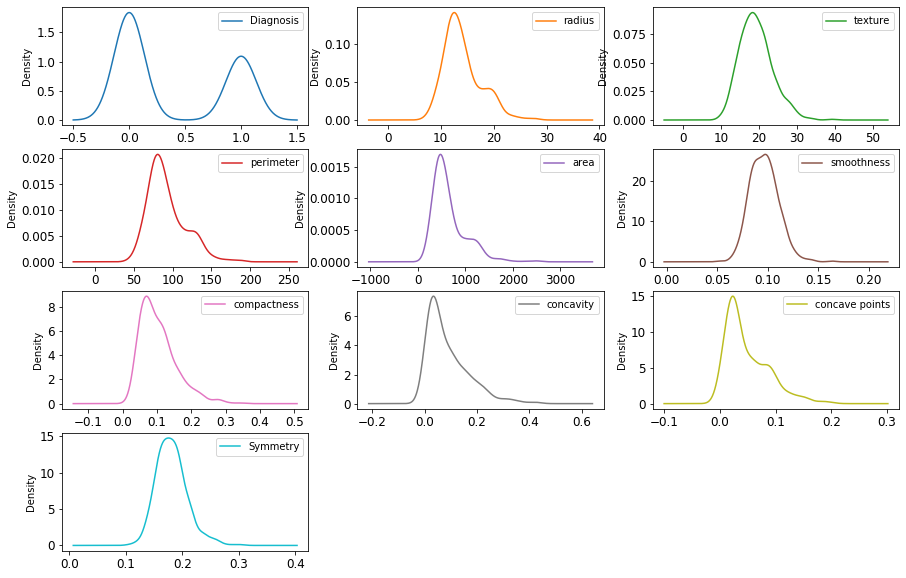

In [82]:
data_id_diag=df.loc[:,["id","Diagnosis"]]
data_diag=df.loc[:,["Diagnosis"]]
data_mean=df.ix[:,1:11]

plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))



(569, 32)


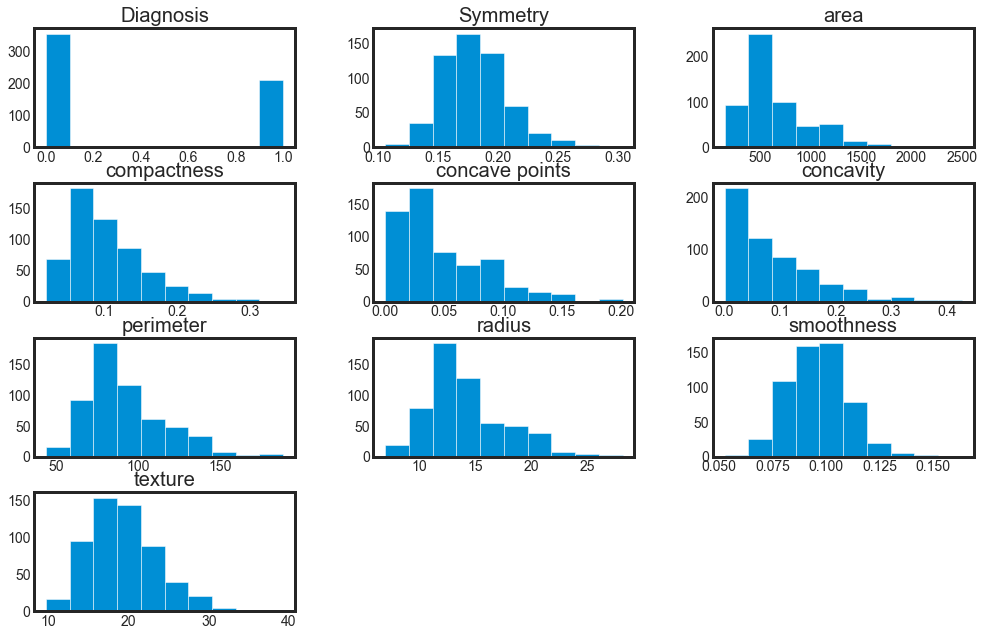

In [126]:
print(df.shape)

hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

In [145]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [146]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))


In [141]:
traindf, testdf = train_test_split(df, test_size = 0.3)

Logistic Regression

In [167]:
predictor_var = ['radius']
outcome_var='Diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 87.940%


In [166]:
predictor_var = ['concave points','area','radius','perimeter','concavity']
outcome_var='Diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)
 

Accuracy : 88.191%


KNeighborsClassifier

In [152]:
predictor_var = ['radius']
model= KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.196%


In [168]:
predictor_var = ['concave points','area','radius','perimeter','concavity']
outcome_var='Diagnosis'
model= KNeighborsClassifier()
classification_model(model,traindf,predictor_var,outcome_var)


Accuracy : 89.698%


In [ ]:
Random Forest Classifier

In [178]:
predictor_var =  ['radius']
outcome_var='Diagnosis'
model = RandomForestClassifier()
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 96.734%


In [179]:
predictor_var = ['concave points','area','radius','perimeter','concavity']
outcome_var='Diagnosis'
model = RandomForestClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 98.995%
